<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/17_k_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
import pandas as pd
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [20]:
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,3
2,1.3,0.2,3
3,1.5,0.2,3
4,1.4,0.2,1


In [15]:
from sklearn.cluster import KMeans

In [37]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [38]:
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 2, 3, 0, 3, 2, 3,
       2, 2, 2, 0, 2, 2, 2, 3, 3, 0, 2, 0, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3,
       2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 0], dtype=int32)

In [39]:
df['clusters'] = y_predicted
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


df['petal width (cm)']: used for the x-axis

df['petal length (cm)']: used for the y-axis

c=y_predicted: assigns a color to each point based on its predicted class

cmap='rainbow': uses the 'rainbow' colormap to color the points by class

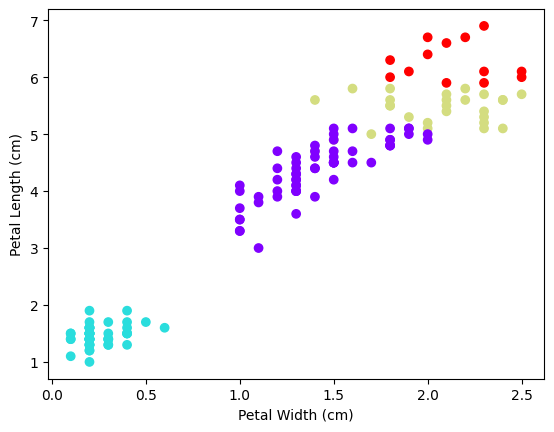

In [41]:
import matplotlib.pyplot as plt

plt.scatter(df['petal width (cm)'],df['petal length (cm)'],c=y_predicted,cmap='rainbow')

plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()


Elbow Plot

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal width (cm)','petal length (cm)']])
  sse.append(km.inertia_)

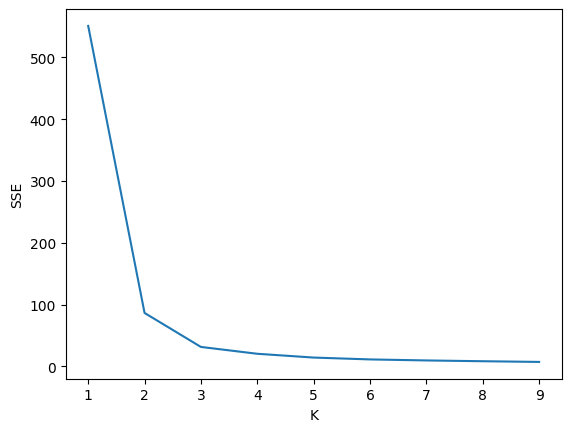

In [43]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)